In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from tkinter.filedialog import askopenfilename

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with

df0=pd.read_excel('C:\\Users\\iande\\Documentos\\proyectos\\ML with lumi data\\osl_parnaiba_table.xlsx',sheet_name="by_aliquot")
df0=df0.drop(columns=['Unnamed: 0','sample','Group'])
df0 = df0.fillna(33.333)


In [205]:
df0 = df0.replace({'Unit':['Serra Grande','Pimenteiras','Longa','Poti','Piaui','Cabecas','Motuca']},{'Unit':'0'})
df0 = df0.replace({'Unit':'Sambaiba'},{'Unit':'1'})
display(df0)

,Unit,BOSL1s,BOSLF,BOSLM,BOSLS,IRSL1.2s/BOSL1s,TL110oC,TL110pos,TL325pos
0,0,12.811713,38.068407,33.330574,28.601019,19.076664,76.183863,96.2,325.8
1,0,12.221442,38.772984,31.830463,29.396553,29.591771,75.658334,96.2,325.8
2,0,13.004011,40.739419,32.236592,27.023990,17.354350,77.313586,96.2,325.8
3,0,11.314952,39.443369,31.129080,29.427551,27.822570,76.931064,96.2,324.0
4,0,3.490668,5.954731,19.595849,74.449419,121.146848,58.377886,98.0,334.8
...,...,...,...,...,...,...,...,...,...
323,0,18.231015,54.266323,14.712779,31.020898,9.833854,50.422455,96.2,325.8
324,0,11.256368,39.588299,16.897768,43.513934,16.675745,43.886663,94.4,325.8
325,0,8.766445,29.489215,24.054931,46.455854,20.252563,39.454300,94.4,333.0
326,0,7.759487,30.913104,21.734711,47.352185,39.636704,42.566480,96.2,329.4


In [206]:
y = np.array(df0['Unit'])
X = df0.drop(columns=['Unit'])

#X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
#print(y),print(X)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0

(None, None)

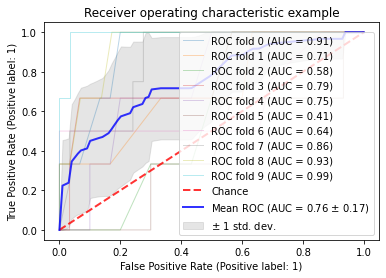

In [207]:
# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()